#### Introduction
The algorithm, given a directed graph and a starting vertex, it will find the shortest paths between the starting vertex and all vertices it can reach. The algorithm only works when the paths have non negative edges connecting the vertices.

Thus, given a graph G = (V, E), a starting vertex s $\in$ V and non negative edges of length $l_e$ where e $\in$ E, the output of the algorithm is dist(s, v) for every vertex v $\in$ V

The dist(s, v) denotes the shortest distance from s to v and dist(s, v) = $\infty$ if there is no path from s to a vertex v.
***
We have seen how BFS can be used to find the shortest path to any vertex from a vertex. This is a special case of graph where each edge has unit length. Djikstra's algorithm is more generic in a way where each edge can have a weight of non positive value.

But can we reduce this graph to a graph where edges are of unit length? That is, if an edge between two vertices have a weight 5, we can replace this edge (with the two vertices) with 5 vertices connected one after other with each edge length of 1 as seen in the following graph



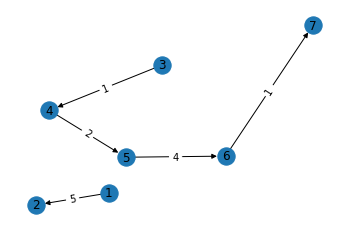

In [1]:
%matplotlib inline
import networkx as nx

DG = nx.DiGraph()
edges = [(1, 2, 5), (3, 4, 1), (4, 5, 2), (5, 6, 4), (6, 7, 1)]
DG.add_weighted_edges_from(edges)
pos = nx.spring_layout(DG,k=0.55,iterations=20)
   # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

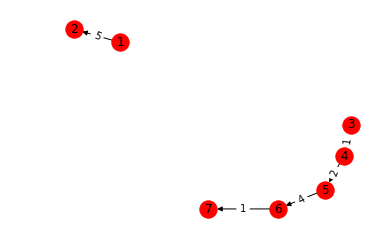

In [72]:
pos = nx.spring_layout(DG)    # spring_layout randomness causes pos to be random
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

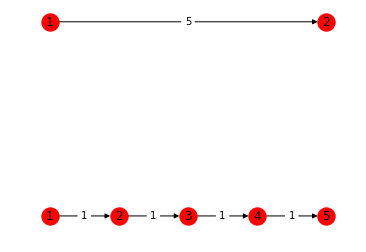

In [21]:
%matplotlib inline
import networkx as nx

g1 = nx.DiGraph()
g1.add_node(1, pos = (0, 5))
g1.add_node(2, pos = (20, 5))
g1.add_edge(1, 2, weight = 5)
pos = nx.get_node_attributes(g1, 'pos')
weights =nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos, edge_labels = weights)
nx.draw(g1, pos, with_labels = True)

g2 = nx.DiGraph()
g2.add_node(1, pos = (0, 0))
g2.add_node(2, pos = (5, 0))
g2.add_node(3, pos = (10, 0))
g2.add_node(4, pos = (15, 0))
g2.add_node(5, pos = (20, 0))
g2.add_edge(1, 2, weight = 1)
g2.add_edge(2, 3, weight = 1)
g2.add_edge(3, 4, weight = 1)
g2.add_edge(4, 5, weight = 1)
pos = nx.get_node_attributes(g2, 'pos')
weights =nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels = weights)
nx.draw(g2, pos, with_labels = True)

The idea sounds right and also works well for small graphs with small length edges. But imagine graphs with vertices of length order or magnitude larger than the number of vertices in a graph (e.g. two vertices connected by edge of length 100 gets transformed to a graoh with 100 vertices each of unit length).

Though BFS runs in linear time of the input graph size, the transformed graph is way larger that the original graph and hence the time complexity is no longer linear with respect to the original input graph and thus this appoach, though clever doesn't practically scale to all graphs.
***
# Dijkstra's Shortest-Path Algorithm
Let us now look at an implementation of Djikstra's algorithm. Though the implementation here can use heap, we will not use it and stick to the approach the Pseudo code gives in thic chapter. This implementation will use Heap in future notebook and we will be able to appreciate the how the choice of right datastructure is crucial even for the same algorithm

## Dijkstra's Algorithm Naive implementation

Printing minimum distances from starting vertex 1
Vertex 1 is at distance 0
Vertex 2 is at distance 1
Vertex 3 is at distance 3
Vertex 4 is at distance 6


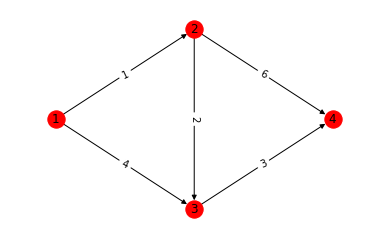

In [9]:
%matplotlib inline
import networkx as nx

def djikstra_naive(DG, source):
    #Naive implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = A[edge[0]] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge[1]  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} is at distance {}".format(node, A[node]))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

djikstra_naive(DG, 1)

Printing minimum distances from starting vertex 1
Vertex 1 is at distance 0
Vertex 2 is at distance 1
Vertex 3 is at distance 3
Vertex 4 is at distance 6


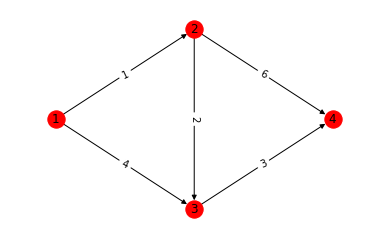

In [207]:
%matplotlib inline
import networkx as nx

def djikstra_naive_nx(DG, source):
    #Naive implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    A = [source]
    all_nodes = list(DG.nodes)
    for node in all_nodes:
        DG.nodes[node]['shortest_dist'] = float('inf')
    DG.nodes[source]['shortest_dist'] = 0
    #print( DG.nodes.data() )
    #print( DG.edges.data() )
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                #print("edge0: {}  edge1: {}".format(edge[0], edge[1]))
                dji_greedy = DG.nodes[edge[0]]['shortest_dist'] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                if edge[1] not in A:
                    DG.nodes[edge[1]]['shortest_dist'] = dji_greedy
                    A.append(edge[1])
                elif dji_greedy < DG.nodes[edge[1]]['shortest_dist']:
                    DG.nodes[edge[1]]['shortest_dist'] = dji_greedy
                    A.append(edge[1])
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge[1]  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in all_nodes:
        print("Vertex {} is at distance {}".format(node, DG.nodes[node]['shortest_dist']))


        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

djikstra_naive_nx(DG, 1)



Printing minimum distances from starting vertex s
Vertex s is at distance 0
Vertex t is at distance 6
Vertex w is at distance 3
Vertex v is at distance 1


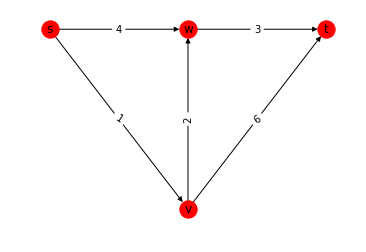

In [10]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

##### Problem 9.2

Consider a directed graph G with a source vertex ss, a destination t, and nonnegative edge lengths. Under what conditions is the shortest s-t path guaranteed to be unique?

a. When all edge lengths are distinct powers of 2.
Since the vertices are powers of two and unique, no two edges can add up to the length of any other edge. Thus the shortest path is unique and not other path is guaranteed to have that length.

Printing minimum distances from starting vertex s
Vertex y is at distance 14
Vertex s is at distance 0
Vertex t is at distance 15
Vertex w is at distance 12
Vertex v is at distance 8


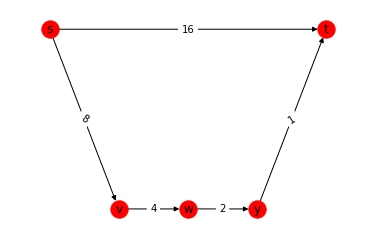

In [11]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (10, 0))
g.add_node('y', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 't', weight = 16)
g.add_edge('s', 'v', weight = 8)
g.add_edge('v', 'w', weight = 4)
g.add_edge('w', 'y', weight = 2)
g.add_edge('y', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

##### Problem 9.3
Consider a directed graph $G = (V,E)$ and a source vertex s with the following properties: edges that leave the source vertex s have arbitrary (possibly negative) lengths; all other edge lengths are nonnegative; and there are no edges from any other vertex to the source s. Does Dijkstra's shortest-path algorithm correctly compute shortest-path distances (from s) in this graph?

Printing minimum distances from starting vertex s
Vertex a is at distance -100
Vertex c is at distance 8
Vertex b is at distance 5
Vertex e is at distance 1
Vertex d is at distance -8
Vertex g is at distance 4
Vertex f is at distance -99
Vertex i is at distance 26
Vertex h is at distance 24
Vertex s is at distance 0
Vertex t is at distance -97


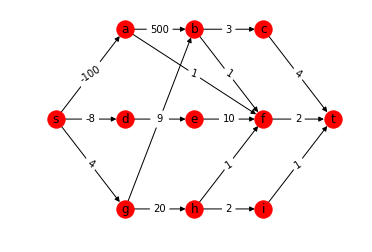

In [12]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = -100)
g.add_edge('a', 'b', weight = 500)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = -8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('g', 'b', weight = 1)  # Changing
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

Printing minimum distances from starting vertex s
Vertex a is at distance -100
Vertex c is at distance 403
Vertex b is at distance 400
Vertex e is at distance 1
Vertex d is at distance -8
Vertex g is at distance 4
Vertex f is at distance -99
Vertex i is at distance 26
Vertex h is at distance 24
Vertex s is at distance 0
Vertex t is at distance -97


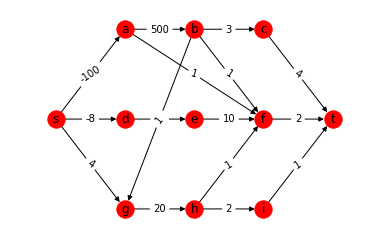

In [13]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = -100)
g.add_edge('a', 'b', weight = 500)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = -8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)  # Changing
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

##### Problem 9.8

Consider a directed graph G and a source vertex ss. Suppose G contains a negative cycle (a directed cycle in which the sum of the edge lengths is negative) and also a path from s to this cycle. Suppose you run Dijkstra's algorithm on G (with source s). Which of the following statements are true?

Printing minimum distances from starting vertex a
Vertex a is at distance 0
Vertex c is at distance -3
Vertex b is at distance 1
Vertex e is at distance 0
Vertex d is at distance -6
Vertex g is at distance -1
Vertex f is at distance -1


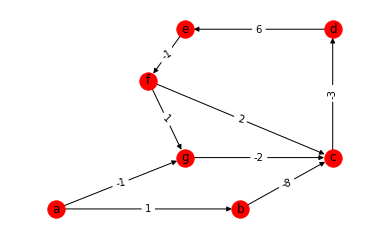

In [14]:
import networkx as nx
g = nx.DiGraph()
g.add_node('a', pos = (0, 5))
g.add_node('b', pos = (10, 5))
g.add_edge('a', 'b', weight = 1)

g.add_node('c', pos = (15, 7))
g.add_edge('b', 'c', weight = -8)

g.add_node('d', pos = (15, 12))
g.add_edge('c', 'd', weight = -3)

g.add_node('e', pos = (7, 12))
g.add_edge('d', 'e', weight = 6)

g.add_node('f', pos = (5, 10))
g.add_edge('e', 'f', weight = -1)
g.add_edge('f', 'c', weight = 2)

g.add_node('g', pos = (7, 7))
g.add_edge('f', 'g', weight = 1)
g.add_edge('g', 'c', weight = -2)
g.add_edge('a', 'g', weight = -1)

pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

djikstra_naive(g, 'a')

As we see in the above graph, we have two directed cycles g -> c -> d -> e -> f -> g and c -> d -> e -> f -> c. Both have non negative sum of lengths. Still, the shortest distance using Djikstra algorithm for c will be calculated as -3 where the true shortest distance is -7. All vertices that gets pulled into frontier after c will be incorrect. For the above graph, except g and b, the distances will be incorrect. Following code snippet demonstrates the incorrect path lengths


## More Problems

**Problem 1: ** <br>
In lecture we define the length of a path to be the sum of the lengths of its edges. Define the bottleneck of a path to be the maximum length of one of its edges. A mininum-bottleneck path between two vertices s and t is a path with bottleneck no larger than that of any other s-t path. Show how to modify Dijkstra's algorithm to compute a minimum-bottleneck path between two given vertices. The running time should be $O(m \log n)$, as in lecture.


    The running time should be O(m logn), as in lecture.
    First we have implemented it using a loop over nodes and edges to get an  O(m n) implementation.
    Later, we will use heap datastructure to get O(m logn) running time.

Printing minimum-bottleneck path from starting vertex 1
Vertex 1 has a minimum-bottleneck of 0 having path ['1']
Vertex 2 has a minimum-bottleneck of 1 having path ['1', '2']
Vertex 3 has a minimum-bottleneck of 2 having path ['1', '2', '3']
Vertex 4 has a minimum-bottleneck of 3 having path ['1', '2', '3', '4']


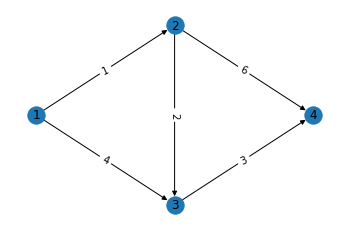

In [34]:
%matplotlib inline
import networkx as nx

def minimum_bottleneck_path_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = DG.edges[edge[0], edge[1]]['weight'] #bottleneck criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                    bottleneck[edge[1]] = dji_greedy
                    #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge[0]]:
                        bottleneck[edge[1]] = dji_greedy
                        #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                    else:
                        bottleneck[edge[1]] = bottleneck[edge[0]]
                    w_overall = edge[1] 
                    v_overall = edge[0] 
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} has a minimum-bottleneck of {} having path {}".format(node, bottleneck[node], B[node].split(',')))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

minimum_bottleneck_path_naive(DG, 1)

Printing minimum-bottleneck path from starting vertex s
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex v has a minimum-bottleneck of 1 having path ['s', 'v']
Vertex w has a minimum-bottleneck of 2 having path ['s', 'v', 'w']
Vertex t has a minimum-bottleneck of 3 having path ['s', 'v', 'w', 't']


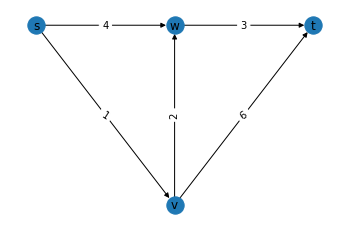

In [35]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

In [36]:
start_vert = 'v'
minimum_bottleneck_path_naive(g, start_vert)

Printing minimum-bottleneck path from starting vertex v
Vertex v has a minimum-bottleneck of 0 having path ['v']
Vertex t has a minimum-bottleneck of 3 having path ['v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['v', 'w']


Printing minimum-bottleneck path from starting vertex s
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex a has a minimum-bottleneck of 5 having path ['s', 'a']
Vertex d has a minimum-bottleneck of 8 having path ['s', 'd']
Vertex g has a minimum-bottleneck of 4 having path ['s', 'g']
Vertex h has a minimum-bottleneck of 20 having path ['s', 'g', 'h']
Vertex b has a minimum-bottleneck of 5 having path ['s', 'a', 'b']
Vertex f has a minimum-bottleneck of 5 having path ['s', 'a', 'f']
Vertex t has a minimum-bottleneck of 5 having path ['s', 'a', 'f', 't']
Vertex c has a minimum-bottleneck of 5 having path ['s', 'a', 'b', 'c']
Vertex e has a minimum-bottleneck of 9 having path ['s', 'd', 'e']
Vertex i has a minimum-bottleneck of 20 having path ['s', 'g', 'h', 'i']


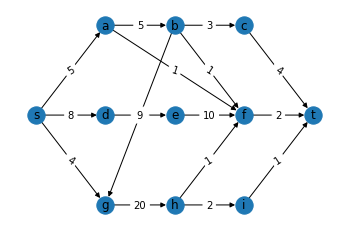

In [37]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

**Problem 2: ** <br>
We can do better. Suppose now that the graph is undirected. Give a linear-time ($O(m)$) algorithm to compute a minimum-bottleneck path between two given vertices.

Printing minimum-bottleneck path from starting vertex v
Vertex s has a minimum-bottleneck of 1 having path ['v', 's']
Vertex t has a minimum-bottleneck of 3 having path ['v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['v', 'w']
Vertex v has a minimum-bottleneck of 0 having path ['v']


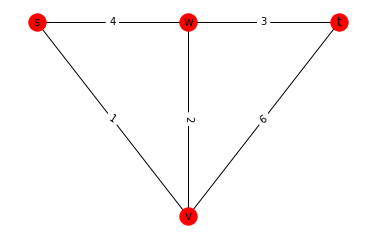

In [14]:
%matplotlib inline
import networkx as nx

def undirected_minimum_bottleneck_path_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge[0] in X) and (edge[1] not in X))  or ((edge[1] in X) and (edge[0] not in X)):
                dji_greedy = DG.edges[edge_tail, edge_head]['weight'] #bottleneck criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                    bottleneck[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge_tail]:
                        bottleneck[edge_head] = dji_greedy
                    else:
                        bottleneck[edge_head] = bottleneck[edge_tail]
                    w_overall = edge_head 
                    v_overall = edge_tail
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} has a minimum-bottleneck of {} having path {}".format(node, bottleneck[node], B[node].split(',')))
        
        

UDG = nx.Graph()
UDG.add_node('s', pos = (0, 5))
UDG.add_node('v', pos = (5, 0))
UDG.add_node('w', pos = (5, 5))
UDG.add_node('t', pos = (10, 5))
UDG.add_edge('s', 'v', weight = 1)
UDG.add_edge('v', 't', weight = 6)
UDG.add_edge('s', 'w', weight = 4)
UDG.add_edge('v', 'w', weight = 2)
UDG.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(UDG, 'pos')
weights =nx.get_edge_attributes(UDG, 'weight')
nx.draw_networkx_edge_labels(UDG, pos, edge_labels = weights)
nx.draw(UDG, pos, with_labels = True)

undirected_minimum_bottleneck_path_naive(UDG, 'v')


Printing minimum-bottleneck path from starting vertex s
Vertex a has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'a']
Vertex c has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'c']
Vertex b has a minimum-bottleneck of 4 having path ['s', 'g', 'b']
Vertex e has a minimum-bottleneck of 9 having path ['s', 'd', 'e']
Vertex d has a minimum-bottleneck of 8 having path ['s', 'd']
Vertex g has a minimum-bottleneck of 4 having path ['s', 'g']
Vertex f has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f']
Vertex i has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 't', 'i']
Vertex h has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'h']
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex t has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 't']


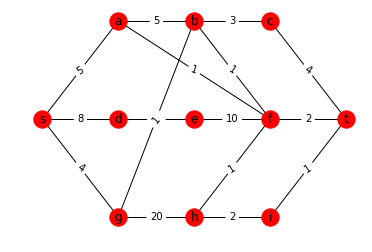

In [15]:
UDg = g.to_undirected()
pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)

undirected_minimum_bottleneck_path_naive(UDg, 's')


Printing minimum-bottleneck path from source vertex v to destination vertex t
Route v -> t has a minimum-bottleneck of 3 having path ['v', 'w', 't']


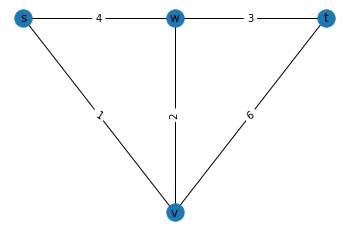

In [31]:
%matplotlib inline
import networkx as nx

def undirected_minimum_bottleneck_route_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge[0] in X) and (edge[1] not in X))  or ((edge[1] in X) and (edge[0] not in X)):
                dji_greedy = DG.edges[edge_tail, edge_head]['weight'] #bottleneck criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                    bottleneck[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge_tail]:
                        bottleneck[edge_head] = dji_greedy
                    else:
                        bottleneck[edge_head] = bottleneck[edge_tail]
                    w_overall = edge_head 
                    v_overall = edge_tail
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        if w_overall == destination:
            break
        
    print("Printing minimum-bottleneck path from source vertex {} to destination vertex {}".format(source, destination))
    for node in A:
        if node == destination:
            print("Route {} -> {} has a minimum-bottleneck of {} having path {}".format(source, destination, bottleneck[node], B[node].split(',')))
        
        

UDG = nx.Graph()
UDG.add_node('s', pos = (0, 5))
UDG.add_node('v', pos = (5, 0))
UDG.add_node('w', pos = (5, 5))
UDG.add_node('t', pos = (10, 5))
UDG.add_edge('s', 'v', weight = 1)
UDG.add_edge('v', 't', weight = 6)
UDG.add_edge('s', 'w', weight = 4)
UDG.add_edge('v', 'w', weight = 2)
UDG.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(UDG, 'pos')
weights =nx.get_edge_attributes(UDG, 'weight')
nx.draw_networkx_edge_labels(UDG, pos, edge_labels = weights)
nx.draw(UDG, pos, with_labels = True)

undirected_minimum_bottleneck_route_naive(UDG, 'v', 't')



Printing minimum-bottleneck path from source vertex s to destination vertex a
Route s -> a has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'a']


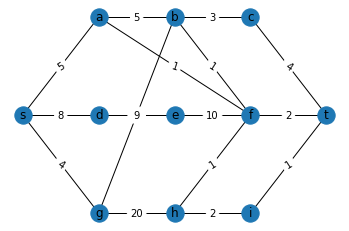

In [38]:
UDg = g.to_undirected()
pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)

undirected_minimum_bottleneck_route_naive(UDg, 's', 'a')




**Problem 3: ** <br>
What if the graph is directed? Can you compute a minimum-bottleneck path between two given vertices faster than $O(m \log n)$ ?

Printing minimum-bottleneck path from starting vertex s
Route s -> a has a minimum-bottleneck of 5 having path ['s', 'a']


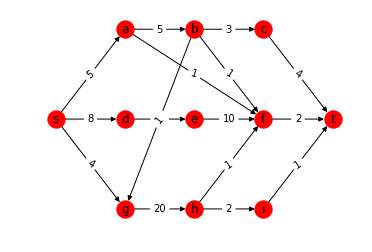

In [23]:
%matplotlib inline
import networkx as nx

def minimum_bottleneck_route_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = DG.edges[edge[0], edge[1]]['weight'] #bottleneck criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                    bottleneck[edge[1]] = dji_greedy
                    #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge[0]]:
                        bottleneck[edge[1]] = dji_greedy
                        #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                    else:
                        bottleneck[edge[1]] = bottleneck[edge[0]]
                    w_overall = edge[1] 
                    v_overall = edge[0] 
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        if w_overall == destination:
            break
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        if node == destination:
            print("Route {} -> {} has a minimum-bottleneck of {} having path {}".format(source, destination, bottleneck[node], B[node].split(',')))        
        

DG = nx.DiGraph()
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dest_vert = 'a'
minimum_bottleneck_route_naive(g, start_vert, dest_vert)


# Challenging problem

In this programming problem you'll code up Dijkstra's shortest-path algorithm.

Download the following text file: dijkstraData.txt

The file contains an adjacency list representation of an undirected weighted graph with 200 vertices labeled 1 to 200. Each row consists of the node tuples that are adjacent to that particular vertex along with the length of that edge. For example, the 6th row has 6 as the first entry indicating that this row corresponds to the vertex labeled 6. The next entry of this row "141,8200" indicates that there is an edge between vertex 6 and vertex 141 that has length 8200. The rest of the pairs of this row indicate the other vertices adjacent to vertex 6 and the lengths of the corresponding edges.

Your task is to run Dijkstra's shortest-path algorithm on this graph, using 1 (the first vertex) as the source vertex, and to compute the shortest-path distances between 1 and every other vertex of the graph. If there is no path between a vertex vv and vertex 1, we'll define the shortest-path distance between 1 and vv to be 1000000.

You should report the shortest-path distances to the following ten vertices, in order: 7,37,59,82,99,115,133,165,188,197. You should encode the distances as a comma-separated string of integers. So if you find that all ten of these vertices except 115 are at distance 1000 away from vertex 1 and 115 is 2000 distance away, then your answer should be 1000,1000,1000,1000,1000,2000,1000,1000,1000,1000. Remember the order of reporting DOES MATTER, and the string should be in the same order in which the above ten vertices are given.

IMPLEMENTATION NOTES: This graph is small enough that the straightforward $O(mn)$ time implementation of Dijkstra's algorithm should work fine. OPTIONAL: For those of you seeking an additional challenge, try implementing the heap-based version. Note this requires a heap that supports deletions, and you'll probably need to maintain some kind of mapping between vertices and their positions in the heap.

Printing minimum distances from starting vertex s
Vertex a is at distance 5
Vertex e is at distance 16
Vertex t is at distance 8
Vertex i is at distance 9


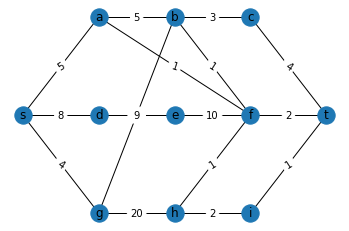

In [39]:
%matplotlib inline
import networkx as nx

def undirected_djikstra_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge_tail in X) and (edge_head not in X)) :
                dji_greedy = A[edge_tail] + DG.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge_head  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in A:
        if node in destination:
            print("Vertex {} is at distance {}".format(node, A[node]))
        
        


pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)


dest_verts = ['e', 'i', 't', 'a']
undirected_djikstra_naive(UDg, 's', dest_verts)

In [48]:
import urllib3

def testcase():
    challenge_graph = nx.Graph()
    http = urllib3.PoolManager()
    r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_dcf1d02570e57d23ab526b1e33ba6f12_dijkstraData.txt?Expires=1562630400&Signature=ZOvhWVbzgyiVE3G--kHjTZFT88KvlX2Tg~FJ6XpH7EISRUhkXTLk2cBMie1fREsIUI3zJdd3gWkLasBOiU-bZO4Ud91saYKaj-wfcSsh05uGTglYjtKYNHVPDfG2MkKUiTgzRjdhokyrC-gPJQhHeiyGaeAlLKnz81x5rT7zv0M_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
    IntegerMatrixStringJoin = r1.data.decode('utf8').split('\r\n')
    IntegerMatrixStringJoin.remove('')
    edges = []
    for i in IntegerMatrixStringJoin:
        node_edges = i.split('\t')
        sourceint = int(node_edges[0])
        dest_list = node_edges[1:-1]
        challenge_graph = nx.Graph()
        for edstr in dest_list:
            edlist = edstr.split(',')
            destint = int(edlist[0])
            edgeweight = int(edlist[1])
            edges.append((sourceint, destint, edgeweight))
    challenge_graph.add_weighted_edges_from(edges)
    nx.draw(challenge_graph, with_labels = True)
    return challenge_graph

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Printing minimum distances from starting vertex 1
Vertex 7 is at distance 2599
Vertex 37 is at distance 2610
Vertex 59 is at distance 2947
Vertex 82 is at distance 2052
Vertex 99 is at distance 2367
Vertex 115 is at distance 2399
Vertex 133 is at distance 2029
Vertex 165 is at distance 2442
Vertex 188 is at distance 2505
Vertex 197 is at distance 3068


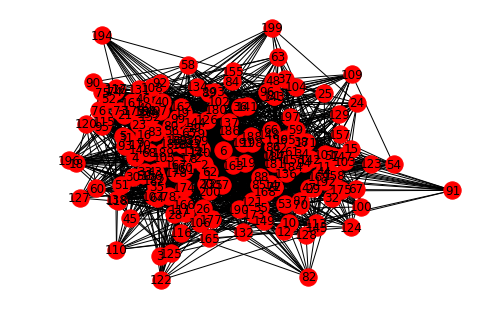

In [23]:

dest_verts = [7,37,59,82,99,115,133,165,188,197]
undirected_djikstra_naive(testcase(), 1 , dest_verts)


Ans:  2599,2610,2947,2052,2367,2399,2029,2442,2505,3068

<br><br><br>
***
# Dijkstra's Algorithm using Heaps
Recall that in Djikstra's algorithm the crux was to pick the next vertex with lowest Djikstra score greedily. In absence of datastructure like Heap, we have to look at all edges where one vertex has its Djikstra's score calculated and another one lies outside the frontier. This is an expensive operation and the algorithm in absence of heap runs in polynomial time in worst case. Lets implement heap using heapq package in the following code snippet. 

Printing minimum distances from starting vertex s
Vertex s is at distance 0
Vertex t is at distance 6
Vertex w is at distance 3
Vertex v is at distance 1


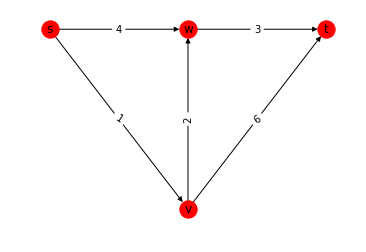

In [3]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np

def djikstra_heap(DG, source, destination):
    #Heap implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    minHeap = []
    heapq.heappush(minHeap, [0, source])
    all_nodes = list(DG.nodes)
    for node in all_nodes:
        DG.nodes[node]['shortest_dist'] = float('inf')
    while len(minHeap) != 0:
        w = heapq.heappop(minHeap)
        X.append(w[1])
        DG.nodes[w[1]]['shortest_dist'] = w[0]
        for edge in list(DG.edges):
            if (edge[0] == w[1]) and (edge[1] not in X):  # node that has just been popped should be the tail
                dji_greedy = w[0] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                doublenp = np.array(minHeap)
                singlenp = []
                if len(doublenp) == 0:
                    heapq.heappush(minHeap, [dji_greedy, edge[1]])
                    continue
                else:
                    singlenp = doublenp[:,1]
                if edge[1] not in singlenp:
                    heapq.heappush(minHeap, [dji_greedy, edge[1]])
                else:
                    dest_idx = np.where(singlenp == edge[1])
                    if dji_greedy < doublenp[dest_idx][0][0]:
                        minHeap[dest_idx[0][0]] = minHeap[0]
                        heapq.heappop(minHeap)
                        heapq.heappush(minHeap, [dji_greedy, edge[1]])
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in all_nodes:
        if node in destination:
            print("Vertex {} is at distance {}".format(node, DG.nodes[node]['shortest_dist']))

        

g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dest_verts = ['s', 'v', 'w', 't']
djikstra_heap(g, start_vert, dest_verts)


Heap:
Edge: 2 updated with dist: 20
Edge: 5 updated with dist: 3
Edge: 2 updated with dist: 7
Edge: 4 updated with dist: 6
Edge: 14 updated with dist: 5
Edge: 8 updated with dist: 7
Edge: 7 updated with dist: 6
Edge: 6 updated with dist: 33
Edge: 13 updated with dist: 11
Edge: 3 updated with dist: 36
Edge: 12 updated with dist: 26
Edge: 3 updated with dist: 12
Edge: 13 updated with dist: 8
Edge: 12 updated with dist: 17
Edge: 9 updated with dist: 10
Edge: 10 updated with dist: 14
Edge: 6 updated with dist: 22
Edge: 11 updated with dist: 20
Naive:
Edge: 2 updated with dist: 20
Edge: 5 updated with dist: 3
min Edge: 5 ended with dist: 3
Edge: 2 updated with dist: 7
Edge: 4 updated with dist: 6
Edge: 14 updated with dist: 5
Edge: 8 updated with dist: 7
Edge: 7 updated with dist: 6
Edge: 6 updated with dist: 33
min Edge: 14 ended with dist: 5
Edge: 13 updated with dist: 11
min Edge: 4 ended with dist: 6
Edge: 3 updated with dist: 36
Edge: 12 updated with dist: 26
min Edge: 7 ended with dis

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

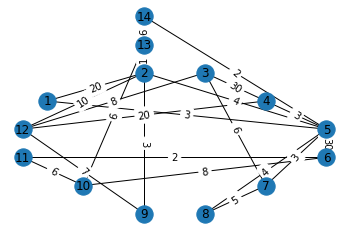

In [70]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np

def undirected_djikstra_heap(DG, source, destination):
    #Heap implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    minHeap = []
    heapq.heappush(minHeap, [0, source])
    all_nodes = list(DG.nodes)
    for node in all_nodes:
        DG.nodes[node]['shortest_dist'] = float('inf') 
    print("Heap:")
    while len(minHeap) != 0:
        w = heapq.heappop(minHeap)
        #print(minHeap)
        X.append(w[1])
        DG.nodes[w[1]]['shortest_dist'] = w[0]
        for edge in list(DG.edges):
            if (edge[0] == w[1]) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] == w[1]) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            else:
                continue
            if ((edge_tail == w[1]) and (edge_head not in X)) : # node that has just been popped should be the tail
                dji_greedy = w[0] + DG.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
                if len(minHeap) == 0:
                    heapq.heappush(minHeap, [dji_greedy, edge_head])
                    print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                    continue
                singlenp = [i[1] for i in minHeap]
                if edge_head not in singlenp:
                    heapq.heappush(minHeap, [dji_greedy, edge_head])
                    print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                else:
                    dest_idx = singlenp.index(edge_head)
                    if dji_greedy < minHeap[dest_idx][0]:
                        minHeap[dest_idx] = minHeap[0]
                        heapq.heappop(minHeap)
                        heapq.heappush(minHeap, [dji_greedy, edge_head])
                        print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
    #print("Printing minimum distances from starting vertex \'{}\'".format(source))
    B = []
    for node in all_nodes:
        if node in destination:
            #print("Vertex {} is at distance {}".format(node, DG.nodes[node]['shortest_dist']))
            B.append([node, DG.nodes[node]['shortest_dist']])
    B = sorted(B)
    return B

            
def undirected_djikstra_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    print("Naive:")
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge_tail in X) and (edge_head not in X)) :
                dji_greedy = A[edge_tail] + DG.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                    print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                    print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge_head  
        print("min Edge: {} ended with dist: {}".format(w_overall, minimum_2nd_overall))
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    #print("Printing minimum distances from starting vertex {}".format(source))
    B = []
    for node in A:
        if node in destination:
            #print("Vertex {} is at distance {}".format(node, A[node]))
            B.append([node, A[node]])
    B = sorted(B)
    return B
        

    
from heapq import heappush, heappop


g = nx.Graph()
g.add_node(1, pos = (-3, 20))
g.add_node(2, pos = (5, 25))
g.add_node(3, pos = (10, 25))
g.add_node(4, pos = (15, 20))
g.add_node(5, pos = (20, 15))
g.add_node(6, pos = (20, 10))
g.add_node(7, pos = (15, 5))
g.add_node(8, pos = (10, 0))
g.add_node(9, pos = (5, 0))
g.add_node(10, pos = (0, 5))
g.add_node(11, pos = (-5, 10))
g.add_node(12, pos = (-5, 15))
g.add_node(13, pos = (5, 30))
g.add_node(14, pos = (5, 35))


#edges = [(4,5,6),(7,3,6),(10,13,6),(4,5,3),(14,13,6),(14,5,2),(5,2,1), (1,2,20), (1,5,3), (2,5,4), (13, 2,1), (12,2,10), (12,3,8), (9,2,3), (4,3,30), (4,12,20), (12,9,7), (11,6,2), (11,10,6), (6,10,8), (8,7,5), (8,5,4), (7,5,3), (5,6,30)]
g.add_weighted_edges_from(edges)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 1
dest_verts = g.nodes
heap_dji = undirected_djikstra_heap(g, start_vert, dest_verts)
naive_dji = undirected_djikstra_naive(g, start_vert , dest_verts)

for a in range(len(dest_verts)):
    assert heap_dji[a][1] == naive_dji[a][1]




/Users/aishwaya/anaconda2/envs/python_3_6/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Heap:
Edge: 80 updated with dist: 982
Edge: 163 updated with dist: 8164
Edge: 170 updated with dist: 2620
Edge: 145 updated with dist: 648
Edge: 200 updated with dist: 8021
Edge: 173 updated with dist: 2069
Edge: 92 updated with dist: 647
Edge: 26 updated with dist: 4122
Edge: 140 updated with dist: 546
Edge: 11 updated with dist: 1913
Edge: 160 updated with dist: 6461
Edge: 27 updated with dist: 7905
Edge: 40 updated with dist: 9047
Edge: 150 updated with dist: 2183
Edge: 61 updated with dist: 9146
Edge: 159 updated with dist: 7420
Edge: 198 updated with dist: 1724
Edge: 114 updated with dist: 508
Edge: 104 updated with dist: 6647
Edge: 30 updated with dist: 4612
Edge: 99 updated with dist: 2367
Edge: 138 updated with dist: 7896
Edge: 169 updated with dist: 8700
Edge: 49 updated with dist: 2437
Edge: 125 updated with dist: 2909
Edge: 117 updated with dist: 2597
Edge: 55 updated with dist: 6399
Edge: 27 updated with dist: 1222
Edge: 17 updated with dist: 9423
Edge: 22 updated with dist

Edge: 94 updated with dist: 4457
Edge: 156 updated with dist: 3637
Edge: 187 updated with dist: 4296
Edge: 127 updated with dist: 3285
Edge: 44 updated with dist: 3536
Edge: 55 updated with dist: 3990
Edge: 200 updated with dist: 3401
Edge: 182 updated with dist: 5264
Edge: 171 updated with dist: 4688
Edge: 137 updated with dist: 4708
Edge: 4 updated with dist: 3056
Edge: 31 updated with dist: 3455
Edge: 54 updated with dist: 3369
Edge: 182 updated with dist: 3807
Edge: 19 updated with dist: 1044
Edge: 88 updated with dist: 3046
Edge: 187 updated with dist: 1151
Edge: 165 updated with dist: 2442
Edge: 176 updated with dist: 2279
Edge: 50 updated with dist: 3636
Edge: 38 updated with dist: 3548
Edge: 161 updated with dist: 4772
Edge: 163 updated with dist: 3554
Edge: 5 updated with dist: 2525
Edge: 137 updated with dist: 3599
Edge: 83 updated with dist: 3997
Edge: 21 updated with dist: 4593
Edge: 74 updated with dist: 5044
Edge: 97 updated with dist: 5270
Edge: 191 updated with dist: 56

Edge: 28 updated with dist: 10471
Edge: 148 updated with dist: 4536
Edge: 179 updated with dist: 8683
min Edge: 170 ended with dist: 1365
Edge: 2 updated with dist: 10707
Edge: 33 updated with dist: 5013
Edge: 45 updated with dist: 9425
Edge: 84 updated with dist: 3801
Edge: 164 updated with dist: 1693
min Edge: 158 ended with dist: 1376
Edge: 157 updated with dist: 3257
Edge: 91 updated with dist: 6929
Edge: 112 updated with dist: 1759
Edge: 139 updated with dist: 4827
Edge: 181 updated with dist: 2345
Edge: 124 updated with dist: 3246
min Edge: 175 ended with dist: 1432
Edge: 157 updated with dist: 3029
Edge: 156 updated with dist: 3637
Edge: 8 updated with dist: 2454
Edge: 58 updated with dist: 5107
Edge: 67 updated with dist: 6480
Edge: 197 updated with dist: 7341
min Edge: 131 ended with dist: 1445
Edge: 61 updated with dist: 8369
Edge: 159 updated with dist: 5800
Edge: 2 updated with dist: 8450
Edge: 14 updated with dist: 1803
Edge: 82 updated with dist: 4902
Edge: 98 updated wit

min Edge: 196 ended with dist: 2417
Edge: 188 updated with dist: 2505
min Edge: 53 ended with dist: 2420
Edge: 34 updated with dist: 2656
Edge: 7 updated with dist: 2599
Edge: 62 updated with dist: 2573
min Edge: 178 ended with dist: 2435
min Edge: 49 ended with dist: 2437
Edge: 4 updated with dist: 3056
min Edge: 165 ended with dist: 2442
Edge: 23 updated with dist: 2650
Edge: 83 updated with dist: 3997
Edge: 74 updated with dist: 5044
min Edge: 86 ended with dist: 2461
Edge: 75 updated with dist: 2720
Edge: 184 updated with dist: 3262
Edge: 84 updated with dist: 2656
min Edge: 132 ended with dist: 2468
Edge: 22 updated with dist: 4028
min Edge: 102 ended with dist: 2478
Edge: 69 updated with dist: 3650
min Edge: 138 ended with dist: 2494
min Edge: 63 ended with dist: 2498
min Edge: 51 ended with dist: 2503
Edge: 5 updated with dist: 2525
Edge: 137 updated with dist: 3599
min Edge: 188 ended with dist: 2505
Edge: 125 updated with dist: 2735
Edge: 184 updated with dist: 2703
min Edge: 

AssertionError: Dist Mismatch at Vertex 2 dist heap 3428, Vertex 2 dist naive 2971

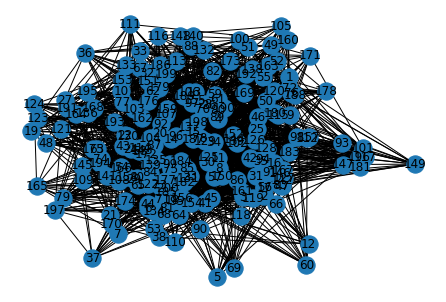

In [69]:
challenge_graph_g = testcase()
start_vert = 1
dest_verts = challenge_graph_g.nodes
heap_dji = undirected_djikstra_heap(challenge_graph_g, start_vert, dest_verts)
naive_dji = undirected_djikstra_naive(challenge_graph_g, start_vert , dest_verts)

for a in range(len(dest_verts)):
    assert heap_dji[a][1] == naive_dji[a][1], "Dist Mismatch at Vertex {} dist heap {}, Vertex {} dist naive {}".format(heap_dji[a][0], heap_dji[a][1], naive_dji[a][0], naive_dji[a][1])
    

Heap: <br>
Edge: 2 updated with dist: 8450 <br>
Edge: 2 updated with dist: 3428

$[[4060, 13], [4229, 73], [4829, 23], [4892, 100], [4771, 60], [5038, 46], [5165, 12], [4916, 102], [4938, 37], [4827, 139], [6259, 90], [5803, 146], [5231, 197], [5193, 21], [5457, 79], [5198, 64], [5028, 43], [5217, 123], [5249, 94], [5418, 77], [6110, 7], [6461, 160], [676, 129], [6075, 183], [6303, 179], [6161, 95], [5299, 65], [5800, 159], [3144, 130], [5983, 110], [6028, 4], [4137, 178], [6282, 40], [1073, 194], [3814, 166], [5522, 50], [2977, 165], [6802, 154], [5347, 116], [5457, 87], [6742, 75], [4345, 141], [6740, 180], [1203, 128], [1432, 175], [3091, 34], [4343, 44], [982, 80], [6769, 188], [6817, 86], [648, 145], [4612, 30], [2909, 125], [3829, 177], [6435, 68], [5835, 151], [3871, 25], [8771, 161], [2660, 82], [6059, 98], [5987, 38], [6208, 59], [3649, 155], [2236, 36], [3110, 113], [3773, 85], [3540, 29], [5413, 24], [5992, 138], [7274, 19], [6391, 200], [6399, 55], [5573, 156], [3438, 45], [3158, 109], [2491, 108], [2090, 28], [5677, 22], [7233, 191], [6676, 136], [5846, 61], [2823, 26], [10282, 142], [1759, 112], [7456, 182], [8435, 184], [4824, 162], [1851, 39], [2143, 157], [3826, 120], [4536, 148], [1551, 11], [5072, 54], [3109, 149], [2183, 150], [7667, 48], [2437, 49], [7709, 58], [9236, 62], [7073, 97], [2800, 192], [7868, 163], [9823, 185], [8018, 33], [4288, 78], [8090, 187], [3620, 115], [6259, 126], [3205, 10], [6964, 147], [7723, 84], [10085, 76], [6290, 41], [7025, 171], [2551, 104], [1803, 14], [2620, 170], [815, 199], [3928, 119], [4642, 17], [8375, 93], [7714, 167], [8047, 101], [11672, 143], [6739, 67], [6421, 51], [8742, 71], [6929, 91], [7860, 53], [6375, 89], [3172, 52], [1533, 135], [3558, 174], [8995, 106], [11113, 83], [5963, 196], [2979, 47], [4358, 190], [7076, 31], [4508, 193], [4466, 121], [2367, 99], [3323, 189], [3246, 124], [10828, 164], [4395, 69], [2351, 20], [3320, 18], [2345, 181], [1826, 103], [6139, 42], [2498, 63], [4042, 32], [6006, 195], [5631, 6], [6865, 15], [7906, 88], [4085, 144], [9638, 118], [2540, 107], [7562, 127], [12793, 5], [5930, 3]]$

Naive: <br>
Edge: 2 updated with dist: 10707 <br>
Edge: 2 updated with dist: 8450 <br>
Edge: 2 updated with dist: 3424 <br>
Edge: 2 updated with dist: 3024 <br>
Edge: 2 updated with dist: 2971 <br>
min Edge: 2 ended with dist: 2971 

Printing minimum distances from starting vertex 's'
Vertex s is at distance 0
Vertex v is at distance 1
Vertex w is at distance 3
Vertex t is at distance 6


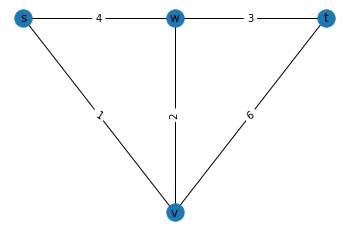

In [3]:
g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dest_verts = ['s', 'v', 'w', 't']
undirected_djikstra_heap(g, start_vert, dest_verts)

Printing minimum distances from starting vertex 's'
Vertex s is at distance 0
Vertex a is at distance 5
Vertex b is at distance 5
Vertex c is at distance 8
Vertex d is at distance 8
Vertex e is at distance 16
Vertex f is at distance 6
Vertex g is at distance 4
Vertex h is at distance 7
Vertex i is at distance 9
Vertex t is at distance 8


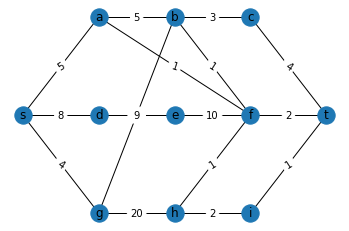

In [4]:
g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dest_verts = g.nodes
undirected_djikstra_heap(g, start_vert, dest_verts)

#### Todo:  correct djikstra algo using heap failing on challenge problem  

/Users/aishwaya/anaconda2/envs/python_3_6/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Printing minimum distances from starting vertex '1'
Vertex 99 is at distance 2367
Vertex 165 is at distance 2442
Vertex 7 is at distance 3024
Vertex 115 is at distance 3620
Vertex 59 is at distance 2947
Vertex 82 is at distance 2660
Vertex 133 is at distance 2937
Vertex 188 is at distance 2610
Vertex 197 is at distance 4840
Vertex 37 is at distance 3684


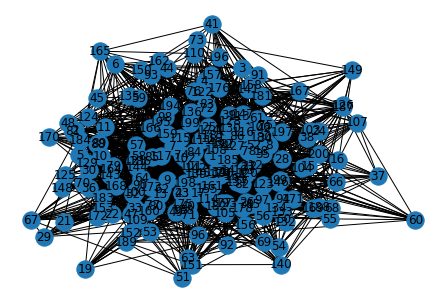

In [13]:
dest_verts = [7,37,59,82,99,115,133,165,188,197]
undirected_djikstra_heap(testcase(), 1 , dest_verts)

Ans:  2599,2610,2947,2052,2367,2399,2029,2442,2505,3068